In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\risha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('MD28 - Atletico Madrid 2-4 Barcelona.csv')

In [51]:
disruptive_event_ids = [4, 5, 7, 8, 10, 11, 12, 41, 44, 49, 52, 54, 55, 56, 59, 67, 74]

In [53]:
barcelona_players = df[df['teamName'] == "Barcelona"]

In [55]:
bdp_counts = barcelona_players[barcelona_players['typeId'].isin(disruptive_event_ids)].groupby("playerName").size()

In [57]:
total_opponent_passes = df[(df['teamName'] != "Barcelona") & (df['typeId'] == 1)].shape[0]

In [59]:
bdp_values = (bdp_counts / total_opponent_passes) * 100
bdp_values = bdp_values.fillna(0).sort_values(ascending=False)

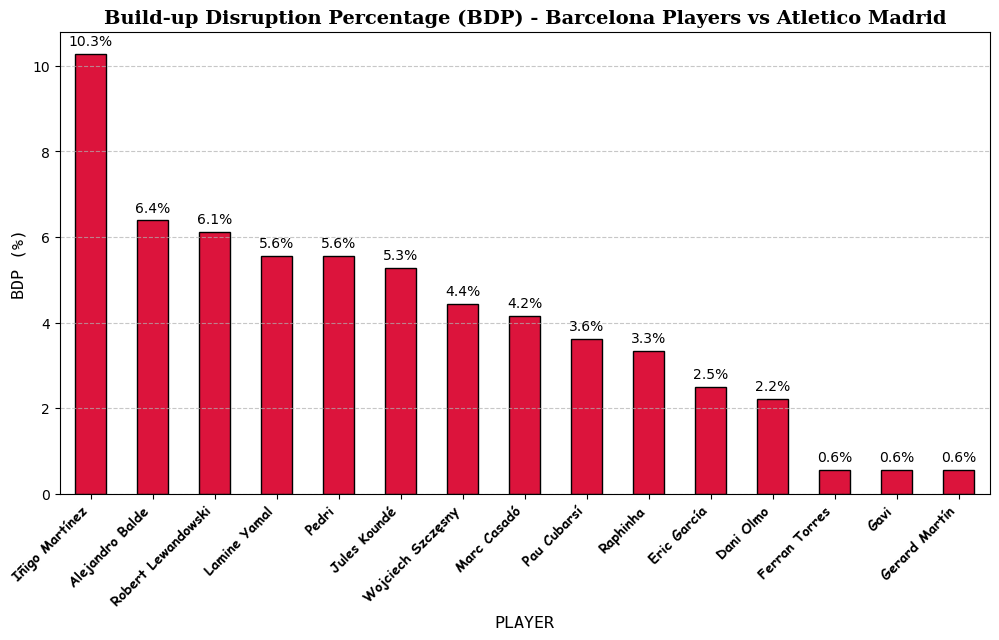

In [69]:
plt.figure(figsize=(12, 6))
bdp_values.plot(kind="bar", color="crimson", edgecolor="black")
plt.title("Build-up Disruption Percentage (BDP) - Barcelona Players vs Atletico Madrid", fontsize=14, fontfamily = "serif", fontweight = "bold")
plt.xlabel("PLAYER", fontsize=12, fontfamily="monospace")
plt.ylabel("BDP (%)", fontsize=12, fontfamily="monospace")
plt.xticks(rotation=45, ha="right", fontfamily="cursive", fontweight = "bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, v in enumerate(bdp_values):
    plt.text(i, v + 0.2, f"{v:.1f}%", ha='center', fontsize=10, color="black")
    
plt.show()

In [63]:
print("Total opponent passes:", total_opponent_passes)

Total opponent passes: 360


In [97]:
print(bdp_counts)

playerName
Alejandro Balde       23
Dani Olmo              8
Eric García            9
Ferran Torres          2
Gavi                   2
Gerard Martín          2
Iñigo Martínez        37
Jules Koundé          19
Lamine Yamal          20
Marc Casadó           15
Pau Cubarsí           13
Pedri                 20
Raphinha              12
Robert Lewandowski    22
Wojciech Szczęsny     16
dtype: int64


In [91]:
bdp_df["BDP_Normalized"] = (bdp_df["BDP"] / bdp_df["BDP"].sum()) * 100

In [99]:
print("Total BDP %:", bdp_df["BDP_Normalized"].sum())

Total BDP %: 100.0


In [79]:
bdp_df = pd.DataFrame({"Player": bdp_per_player.index, "BDP": bdp_per_player.values})

In [81]:
bdp_df["BDP (%)"] = (bdp_df["BDP"] / bdp_df["BDP"].sum()) * 100

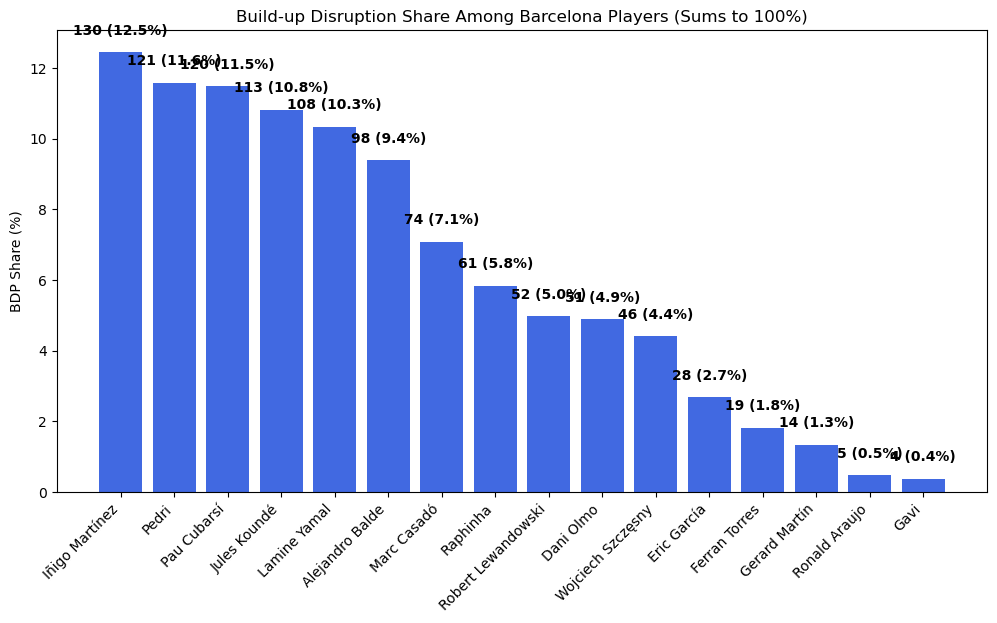

In [101]:
plt.figure(figsize=(12, 6))
bars = plt.bar(bdp_df["Player"], bdp_df["BDP_Normalized"], color="royalblue")

# Add labels: both BDP count and percentage on top of bars
for bar, count, pct in zip(bars, bdp_df["BDP"], bdp_df["BDP_Normalized"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{count} ({pct:.1f}%)", 
             ha="center", fontsize=10, color="black", fontweight="bold")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.ylabel("BDP Share (%)")
plt.title("Build-up Disruption Share Among Barcelona Players (Sums to 100%)")

# Show the plot
plt.show()